# Word frequency in Moby Dick
## 1. Tools for text processing

What are the most frequent words in Herman Melville's novel Moby Dick and how often do they occur?

In this notebook, we'll scrape the novel *Moby Dick* from the website [Project Gutenberg](https://www.gutenberg.org/) (which contains a large corpus of books) using the Python package requests. Then we'll extract words from this web data using *BeautifulSoup*. Finally, we'll dive into analyzing the distribution of words using the **Natural Language ToolKit** (*nltk*).

The *Data Science pipeline* we'll build in this notebook can be used to visualize the word frequency distributions of any novel that you can find on Project Gutenberg. The natural language processing tools used here apply to much of the data that data scientists encounter as a vast proportion of the world's data is unstructured data and includes a great deal of text.

Let's start by loading in the three main python packages we are going to use.

![](img/Moby_Dick_p510_illustration.png)

### Instructions

Import the three python modules you'll use in this project:

* **requests** to fetch the html file that contains the book.
* **BeautifulSoup** to extract the words from the html file.
* **nltk** to analyze the word frequencies.

**requests** and **nltk** can be imported using a regular **import** statement, but **BeautifulSoup** is part of the **bs4** module and has to be imported like this:

    from bs4 import BeautifulSoup

**Good to know**

To complete this project, you need to know how to import web data into python and how to work with natural language text. Before starting this project we recommend that you have completed the following courses:

* [Importing Data in Python (Part 2)](https://www.datacamp.com/courses/importing-data-in-python-part-2).
* [Natural Language Processing Fundamentals in Python](https://www.datacamp.com/courses/nlp-fundamentals-in-python).

In [1]:
# Importing requests, BeautifulSoup and nltk
import requests
from bs4 import BeautifulSoup
import nltk

## 2. Request Moby Dick

To analyze Moby Dick, we need to get the contents of Moby Dick from *somewhere*. Luckily, the text is freely available online at Project Gutenberg as an HTML file: https://www.gutenberg.org/files/2701/2701-h/2701-h.htm .

**Note** that HTML stands for Hypertext Markup Language and is the standard markup language for the web.

To fetch the HTML file with Moby Dick we're going to use the **request** package to make a GET request for the website, which means we're getting data from it. This is what you're doing through a browser when visiting a webpage, but now we're getting the requested page directly into python instead. 

### Instructions

* Use **requests.get** to get the following URL and assign it to **r**:  
    https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm
* Extract the text from **r** and assign it to **html**.
* Print out the first 2000 characters in **html**.

For a guide to how you use **requests** to download a webpage check out [the **request** kickstart guide](http://docs.python-requests.org/en/master/user/quickstart/#response-content).

Note that the HTML file you are asked to request in this task is a cashed version of the following file from Project Gutenberg: https://www.gutenberg.org/files/2701/2701-h/2701-h.htm .

Note that the HTML file you are asked to request in this task is a cashed version of the following file from Project Gutenberg: https://www.gutenberg.org/files/2701/2701-h/2701-h.htm .

In [2]:
# Getting the Moby Dick HTML 
r = requests.get('https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm')

# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
html = r.text

# Printing the first 2000 characters in html
print(html[:2000])

<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >

<html xmlns="http://www.w3.org/1999/xhtml" lang="en">
  <head>
    <title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>
    <style type="text/css" xml:space="preserve">

    body { background:#faebd0; color:black; margin-left:15%; margin-right:15%; text-align:justify }
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; m

## 3. Get the text from the HTML

This HTML is not quite what we want. However, it does *contain* what we want: the text of *Moby Dick*. What we need to do now is *wrangle* this HTML to extract the text of the novel. For this we'll use the package **BeautifulSoup**.

Firstly, a word on the name of the package: Beautiful Soup? In web development, the term "tag soup" refers to structurally or syntactically incorrect HTML code written for a web page. What Beautiful Soup does best is to make tag soup beautiful again and to extract information from it with ease! In fact, the main object created and queried when using this package is called **BeautifulSoup**. After creating the soup, we can use its **.get_text()** method to extract the text.

### Instructions

Extract the text from the html version of the book.

* Create a **BeautifulSoup** object from **html** and assign it to **soup**.
* Extract the text from the **soup** and assign it to **text**.
* Print out the **text** starting from character number **32000** until character number **34000**.

For how to get started using **BeautifulSoup** to read and extract the text check out [this quick start](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#quick-start) and especially the methods **BeautifulSoup** and **.get_text()**.

In [3]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, 'html.parser')

# Getting the text out of the soup
text = soup.get_text()

# Printing out text between characters 32000 and 34000
print(text[32000:34001])

r which the beech tree
        extended its branches.” —Darwin’s Voyage of a Naturalist.
      

        “‘Stern all!’ exclaimed the mate, as upon turning his head, he saw the
        distended jaws of a large Sperm Whale close to the head of the boat,
        threatening it with instant destruction;—‘Stern all, for your
        lives!’” —Wharton the Whale Killer.
      

        “So be cheery, my lads, let your hearts never fail, While the bold
        harpooneer is striking the whale!” —Nantucket Song.
      

     “Oh, the rare old Whale, mid storm and gale
     In his ocean home will be
     A giant in might, where might is right,
     And King of the boundless sea.”
      —Whale Song.





 





      CHAPTER 1. Loomings.
    

      Call me Ishmael. Some years ago—never mind how long precisely—having
      little or no money in my purse, and nothing particular to interest me on
      shore, I thought I would sail about a little and see the watery part of
      the world. It is a

## 4. Extract the words

We now have the text of the novel! There is some unwanted stuff at the start and some unwanted stuff at the end. We could remove it, but this content is so much smaller in amount than the text of Moby Dick that, to a first approximation, it is okay to leave it in.

Now that we have the text of interest, it's time to count how many times each word appears, and for this we'll use **nltk** – **the Natural Language Toolkit**. We'll start by tokenizing the text, that is, remove everything that isn't a word (whitespace, punctuation, etc.) and then split the text into a list of words.

### Instructions

Tokenize the Moby Dick text.

* Create a **tokenizer** object using the function **nltk.tokenize.RegexpTokenizer** that can tokenize a text into words.
* Use the **tokenizer.tokenize** function on the **text** and assign the resulting list of words to **tokens**.
* Print out the first 8 words / tokens.

For how to use the **nltk.tokenize.RegexpTokenizer** function, please see [the example in the **nltk** documentation](http://www.nltk.org/api/nltk.tokenize.html?highlight=regexp#module-nltk.tokenize.regexp).

The **nltk.tokenize.RegexpTokenizer** function requires a regular expression, or regexp for short, as its first argument. You want to match everything that is a word and the regexp that does this is **'\w+'**. Let's unpack this:

* The '\w' is a special character that will match any alphanumeric A-z, a-z, 0-9, along with underscores.
* The '+' tells you that the previous character in the regexp can appear as many times as you want in strings that you're trying to match.

This means that '\w+' will match arbitrary sequences of alphanumeric characters and underscores.

In [4]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the
tokens = tokenizer.tokenize(text)

# Printing out the first 8 words / tokens 
print(tokens[:8])

['Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville']


## 5. Make the words lowercase

OK! We're nearly there. Note that in the above 'Or' has a capital 'O' and that in other places it may not, but both 'Or' and 'or' should be counted as the same word. For this reason, we should build a list of all words in *Moby Dick* in which all capital letters have been made lower case.

### Instructions

Convert the words / tokens to lowercase.

* Loop through the words in **tokens**, make them lowercase, and append them to **words**.
* Print out the first 8 **words** to make sure they are all lowercase.

In this task you'll find the string method **.lower()** handy.

In [5]:
# A new list to hold the lowercased words
words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
    
# Printing out the first 8 words / tokens 
print(words[:8])

['moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville']


## 6. Load in stop words

It is common practice to remove words that appear a lot in the English language such as '**the**', '**of**' and '**a**' because they're not so interesting. Such words are known as **stop words**. The package **nltk** includes a good list of stop words in English that we can use.

### Instructions

Load in the English stop words.

* Load in the English stop words from **nltk** and assign them to **sw**.
* Print out the first 8 stop words in **sw**.

See the **nltk** documentation for [how to load in the stop words](http://www.nltk.org/book/ch02.html#wordlist-corpora).

Before being able to load in the stop words, you have to download them using the command:

    nltk.download('stopwords')

In [6]:
# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')

# Printing out the first eight stop words
print(sw[:8])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']


## 7. Remove stop words in Moby Dick

We now want to create a new list with all **words** in Moby Dick, except those that are stop words (that is, those words listed in *sw*). One way to get this list is to loop over all elements of words and add each word to a new list if they are **not** in *sw*.

### Instructions

Create a new list with the words from Moby Dick, where stop words have been removed.

* Append to **words_ns** all words that are in **words** but not in **sw**.
* Print out the five first words in **words_ns**.

The goal is that **words_ns** should contain all words in **words** except those that are stop words.

In [7]:
# A new list to hold Moby Dick with No Stop words
words_ns = []

# Appending to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Printing the first 5 words_ns to check that stop words are gone
print(words_ns[:5])

['moby', 'dick', 'whale', 'herman', 'melville']


## 8. We have the answer

Our original question was:

    What are the most frequent words in Herman Melville's novel Moby Dick and how often do they occur?

We are now ready to answer that! Let's create a word frequency distribution plot using **nltk**. 

### Instructions

Create a word frequency distribution plot using nltk.

* Create a frequency distribution object using the function **nltk.FreqDist()** and assign it to **freqdist**.
* Use the **plot** method of **freqdist** to plot the 25 most frequent words.

See the **nltk** documentation for [how to use **nltk.FreqDist()**](http://www.nltk.org/book/ch01.html#frequency-distributions).

The **plot** method of a **FreqDist()** object takes the number of items to plot as the first argument. Make sure to set this argument, otherwise **plot** will try to plot all the words which in the case of Moby Dick will take too long time.

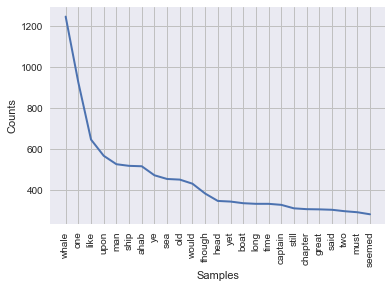

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# This command display figures inline
%matplotlib inline
sns.set()

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)

# Plotting the word frequency distribution
freqdist.plot(25)

## 9. The most common word

Nice! The frequency distribution plot above is the answer to our question.

The natural language processing skills we used in this notebook are also applicable to much of the data that Data Scientists encounter as the vast proportion of the world's data is unstructured data and includes a great deal of text.

So, what word turned out to (*not surprisingly*) be the most common word in Moby Dick?

### Instructions

Take a look at the plot you produced in the last task and assign the most common word in Moby Dick to **most_common_word**.

In [9]:
# What's the most common word in Moby Dick?
most_common_word = 'whale'